### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('data/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Exploratory Data Analysis

In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


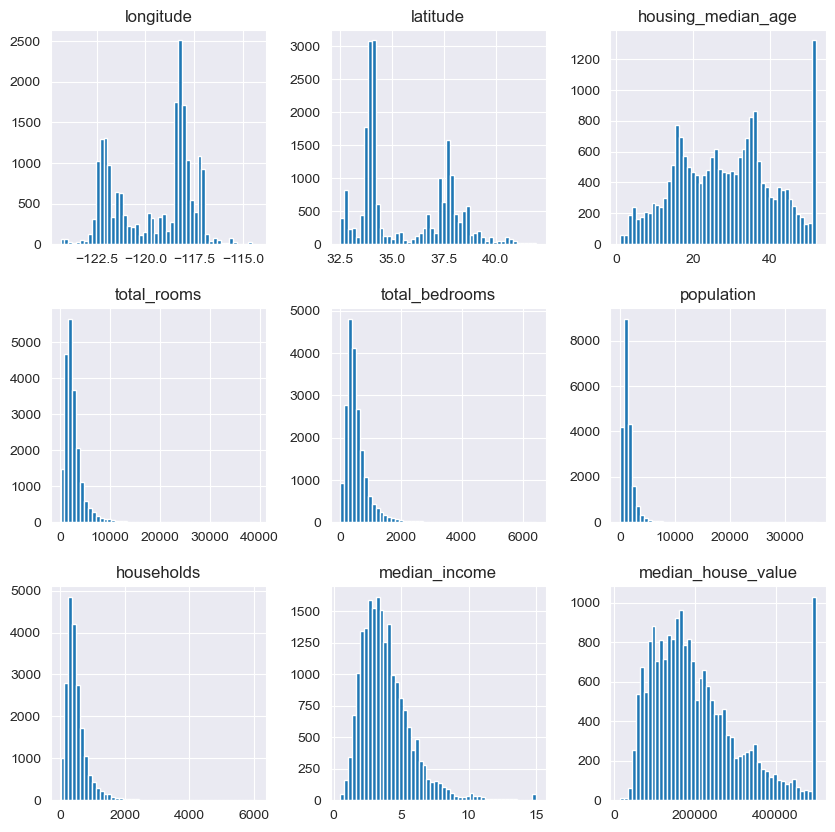

In [8]:
housing.hist(bins=50,figsize=(10,10))
plt.show()

In [9]:
#creating test set
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

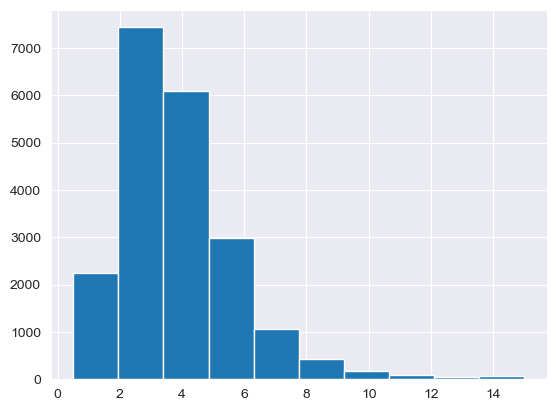

In [10]:
# Most median income values are clustered around 2–5 (tens of thousands of dollars), but some median incomes go far beyond 6
housing['median_income'].hist()

In [11]:
#create an income category attribute with five categories of median income
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.,1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

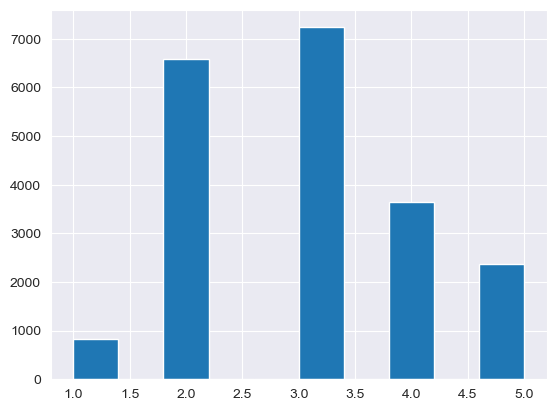

In [12]:
housing['income_cat'].hist()

In [13]:
cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

##### Now we are ready to do stratified sampling based on the income category that we have just created using StratifiedShuffleSplit class.

In [14]:

#StratifiedShuffleSplit Provides train/test indices to split data in train/test sets
#n_splits is the number of splittig iterations
#test_size defines the percentage of our dataset that we want to keep for testing
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index] #collects districts by index
    strat_test_set = housing.loc[test_index]


In [15]:
# This following code gives us a table that shows us the sampling bias comparison of startified versus purely random sampling:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [16]:

#As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


##### Here we can see clearly that the stratified error is significantly smaller for each bin and also we can show an improvement in representation of proportions in the subset. Thus, we minimized the chance of sampling bias and will have a better base for our predictions later on.

Now we have to remove the income_cat attribute so the data goes back to it's original state:

In [17]:
#check if that attribute is in strat train set -> yes, last column
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [18]:
#same for test set -> also last column
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3


##### Now let’s drop the income_cat attribute from the stratified sets, since we only needed it for actually stratifying the dataset.

In [19]:
#note to self: will give error if run multiple times as the axis will have been removed and thus not found
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [20]:
#now it should not be there anymore --> OK, it's not!
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


### Visualising The Data

In [21]:
# Let’s create a copy so you can play with it without harming the training set.
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

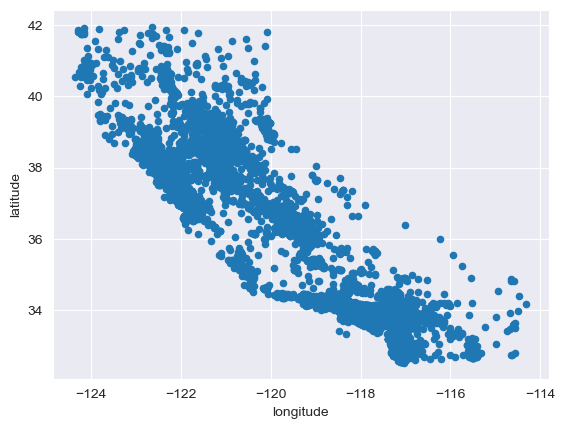

In [22]:
#getting the copy to not harm the original train set
#if the dataset is very large, it is also an option to sample an exploration set (a stratified subset)
housing = strat_train_set.copy()

# add new feutures
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

"""due to the fact that we are working with geographical data we can nicely plot a scatterplot along the axes of 
longitude and latitude - resulting in a data cloud shaped like california."""

housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

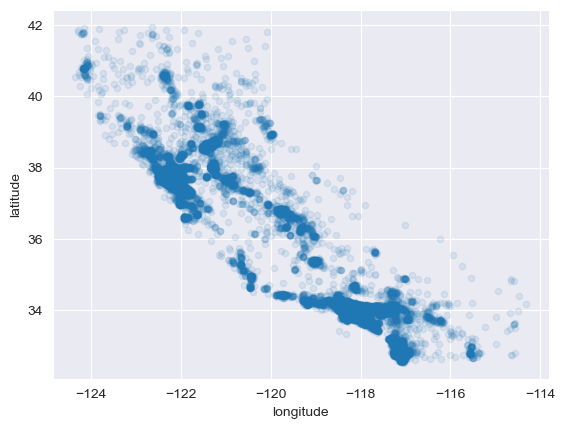

In [23]:
#setting alpha parameter (transparency) in order to better visualize density
#playing aroud with visualization parameters is great way to explore and find patterns
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

This plot visualizes the areas with higher density quite well: along the coast, Los Angeles, San Diego and Central Valley. These areas are even more pronounced when reducing alpha even a little further:

<Axes: xlabel='longitude', ylabel='latitude'>

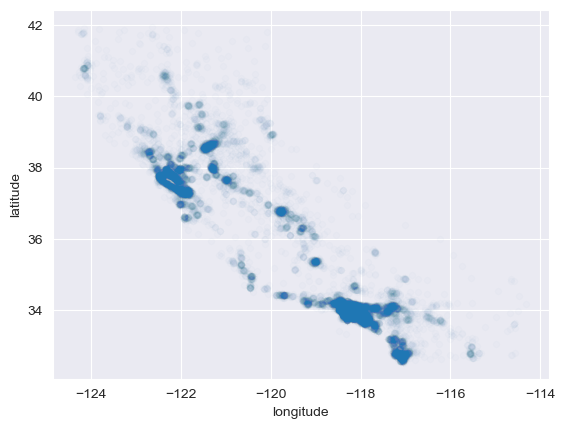

In [24]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.01)

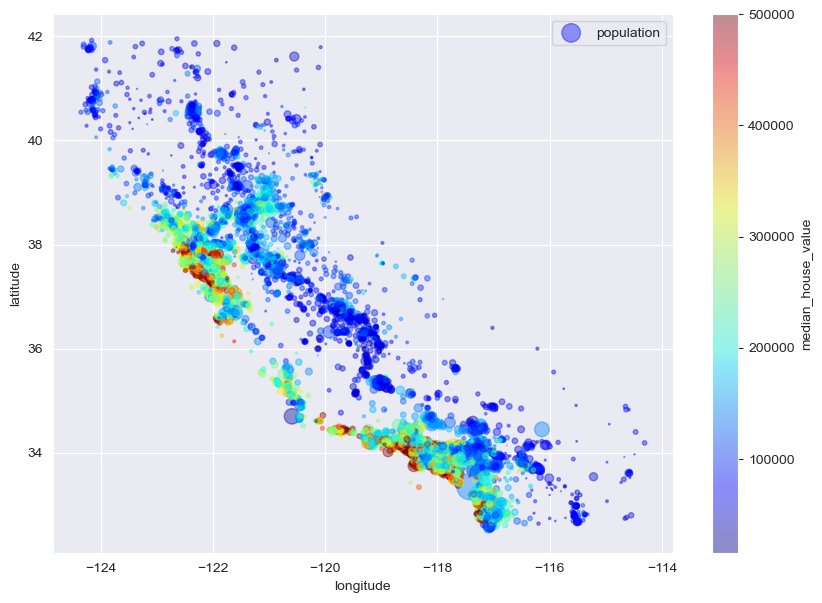

In [25]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
             #option s makes size of each circle represent the districts population size
             s = housing["population"]/100, label = "population", figsize = (10,7),
             #option c makes the colors represent the prices
             #for this we use predefinded colormap "jet" raning from low (blue) to high prices(red)
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True
             )

plt.legend()

What general trends does the image show us?

* the highest prices tend to be along the coast - this indicates ocean proximity to be an influential factor
* the lowest prices tend to be more in areas of lower population density, more inland
* a general trend seems to be that the further away from the ocean, the less expensive housing becomes
* housing seems to be more expensive in the bigger cities 
* the combination of proximity to bigger cities and the ocean seems to increase housing prices
    * we do not have a "proximity to bigger city" attribute, but I think it very likely that if we had it it would help
    * in the north, housing prices acoording to this theory may be lower even when bay proximity is high, as there are no bigger cities close by


### Looking for Correlations
We are now using the corr() method to look for correlations (standard correlation coefficient, "Pearson's r"):

In [26]:
#OWN
#wanted to see the whole matrix and limited the decimals for better readability
corr_matrix = pd.DataFrame(housing.corr())
corr_matrix = corr_matrix.round(decimals = 2)

#in jupyter use display here instead of print
display(corr_matrix)


ValueError: could not convert string to float: 'INLAND'

How much does each attribute correlate with our target “median_house_value”?

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending = False)

Observations:
* median income seems to be an important factor with a correlation of about 0.7
* next biggest but small correlation of about 0.1/-0.1 with total rooms, housing median age and latitude
* I think the lower negative latitude correlation can be explained with that lower latitude values indicate more closeness to the coast, and the coast tends to have higher housing prices.


In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))

#the diagonal would just plot each attribute against itself, so pandas displays a histogram of the respective ...
#... attribute there (by default at least, there is more options, look into documentation)

Observations:
* tail heavy data
* positive correlations in med income and med house value in both directions

In [ ]:
#OWN
#wanted to see the correlation with latitude visualized, just for fun
housing.plot(kind = "scatter", x = "median_house_value", y = "latitude", alpha = 0.01)


* doesn't look great but we can see that higher latitude means lower number of high housing prices.

In [ ]:
#median income vs median house value has a clear positive correlation, so we will zoom in on it
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

Observations:

* clear upward trend, not too much dispersion
* line at 500k as data was capped
* more, less obvious lines at about 460k, 350k, 280k - data quirks that should be removed so our algorithm doent learn them (--> it is not shown in the book how to do that)

We will need to do some data cleaning soon, but we will now first play with attribute combinations and create some new attributes. Some of the given ones such as population, total number of bedrooms or total rooms are not very useful by themselves, but as we have good reason to assume that combining them will increase the amount of information that we can get from them about a disrict, that is what we will now do:

In [ ]:
#OWN
#plotting the correlation between bedrooms_per_room and median_house_value

housing.plot(kind = "scatter", x = "median_house_value", y = "bedrooms_per_room", alpha = 0.1)

In [ ]:
housing

We gained some higher correlation through the new attribute "bedrooms per room". That is quite intuitive. I think the correlation is still relatively small because even though small or inexpensive houses have more bedrooms per room and expensive houses tend to have more rooms in general, they also tend to have more bedrooms.

This phase was for exploring and giving us some initial ideas in order to develop a first reasonably good prototype. These processes most of the time are kind of iterative anyways, and we can and often have to return to this type of step from that prototype to do more or more specific exploration if necessary.

In [ ]:
#OWN
#plotting the correlation between bedrooms_per_room and median_house_value

housing.plot(kind = "scatter", x = "rooms_per_household", y = "median_house_value", alpha = 0.2)
plt.axis([0,5,0,520000])
plt.show()

Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district — obviously the larger the houses, the more expensive they are.

<h3>Preparing Data for ML Algorithms</h3>
    
<h4> Data Cleaning</h4>

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

#looking at correlation with target value
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

Instead of preparing the data manually we should write functions or use what e.g. *scikit-learn* provides already. This allows reproduction on other datasets, gradually builds a library of transformation functions to get back to in the future and makes it easy to compare different kinds of transformations. 

Fistly we will get a new copy of strat_train_set and seperate the labels. Like this we maintain the freedom of applying different transformations to predictor and target values.

In [ ]:
#drop here creates copy of the data without the target value
#does not affect strat_train_set, and that copy is then stored in "housing"
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()
#OWN, just wanted to see
housing.head()

As most ML algorithms do not work properly with missing features, we will now have to take care of those, as we discovered earlier that the total_bedrooms attribute contained NULL-valued entries.

Generally, we have three options:
* remove the affected districts
* remove the entire attribute
* set the values to something (median, mean, mode, zero....)


In general, we should rather stay away from removing data or attributes, unless we have no doubt that the attribute does not contain any valuable information for our problem. Removing entire entries we should only do if we have LOTS of data and the risk of biasing the results is low (especially when it affects a whole "cluster" rather than random entries "here and there", we will have higher risk of biasing). Also we can consider it if there is for example more missing in the entry than just one attribute value. Still, it should rather be avoided if possible.

When researching the topic further by myself, I found that *regression analysis* is another common approach to filling in these missing values - it can be used to predict the nullvalued entry using other information from the dataset. That will only work if the dataset is well connected. Also I found that depending on the nature of the dataset, the number of missing or faulty entries and/or how the data was gathered, we can manually fill them in. If the effort is justifiable, you can do your own research if you find another reliable source for the data or ask the people who gathered/produced it.

The three aforementioned options from above we can put into action with DataFrames' *dropna(), drop() and fillna()* methods:

In [ ]:
#option 1: getting rid of corresponding districts -> not doing that
#housing.dropna(subset = ["total_bedroons"]) 
#option 2: dropping entire attribute --> not doing that either
#housing.drop("total_bedrooms", axis = 1) 

#option 3, calc median and replace nullvals with it
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace = True)

Scikit-Learn provides us with a class called *SimpleImputer* that helps us take care of missing values:

In [ ]:
#we have to firstly create a SimpleImputer instance, specifying that we want to replace each missing value with...
#...the median of the corresponding attribute
imputer = SimpleImputer(strategy = "median") #set mean by default

#median only works for numerical attributes, so create copy of the data without ocean_proximity (text attribute)
housing_num = housing.drop("ocean_proximity", axis = 1)

#now we can fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)
SimpleImputer(add_indicator=False,copy=True, fill_value=None, missing_values=np.nan, strategy='median')

The Imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes.

In [ ]:
#looking at the imputer's statistics_ attribute here
#it gives us an array containing the imputation fill value for each feature
#so the 5th value (index 4) is the median for the total_bedrooms which can be used to fill the missing ones
imputer.statistics_

In [ ]:
#we can also get them this way
housing_num.median().values

Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians.

In [ ]:
X = imputer.transform(housing_num)

#result is a plain numpy array that contains the transformed features. Lets put it back into a pandas DataFrame:
#columns = column labels to use for resulting frame, defaulting to RangeIndex(0, 1, 2, …, n)
#index = index to use for resulting frame, defaultingto RangeIndex if none provided

housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.head()

In [ ]:
housing_tr.hist()

In [ ]:
imputer.strategy

### Data Preprocessing
<h4>Handling Text and Categorical Attributes</h4>

Now let’s preprocess the categorical input feature, ocean_proximity

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

As there is a limited number (5) of distinctionable values for ocean proximity, this is a categorical attribute. Because it is better to work with numbers for most ML Algorithms, we will now convert the text to numbers using Scikit-Learn's *OrdinalEncoder* class.

In [ ]:
#housing_cat = housing[["ocean_proximity"]] is defined before 

#creating an instance of ordinal encoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
#show list of categories by accessing the ordinal_encoder instance's categories_attribute that saves the categories
ordinal_encoder.categories_

**Possible problem:** this representation might make the ML algorithm "assume" that two nearby values are more similar than those further apart, which does not make sense in our case. Thus, we will use a binary matrix representation instead.

In [ ]:
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
housing_cat_1hot.toarray()

In [ ]:
cat_encoder.categories_

If a categorical attribute has a large number of possible categories, one-hot-encoding will result in a large number of input features. This can slow down training and degrade performance.
Such categorical attributes can be postal codes, species, brands and other things that by nature have a larger space of permutations.
A possible way to address this is to transform the affected attributes, for example instead of “near ocean” or “island” it would make sense to, as an idea, instead use distance to ocean in miles/km. That is the preferable way of doing it - if it is possible.
Alternatively, we can replace each category with a learnable, low-dimensional vector called an embedding. Each categoriy’s representation will then be learned during training (this is an example of something called representation learning –> will be adressed later in the book).

### Permutation feature importance
The permutation_importance function calculates the feature importance of estimators for a given dataset.

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_val, y_train, y_val = train_test_split(housing, housing_labels, test_size=0.3, random_state=22)
model = Ridge(alpha=1e-2).fit(housing, housing_labels)
model.score(X_val, y_val)